# 1. Install necessary libraries

In [ ]:
pip install sktime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 11.0 MB/s eta 0:00:00


In [ ]:
pip install xgboost

In [ ]:
pip install kmodes

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load the OULAD dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/OULAD_analysis/'

Mounted at /content/drive


In [ ]:
assess = pd.read_csv(path + 'assessments.csv')
course = pd.read_csv(path + 'courses.csv')
stdAssess = pd.read_csv(path + 'studentAssessment.csv')
stdInfo = pd.read_csv(path + 'studentInfo.csv')
stdReg = pd.read_csv(path + 'studentRegistration.csv')
stdVle = pd.read_csv(path + 'studentVle.csv')
vle = pd.read_csv(path + 'vle.csv')

# 3. Data Preprocessing & Preparation

## StudentInfo dataset

In [ ]:
stdInfo['final_result'] = np.where(stdInfo['final_result'] == 'Withdrawn', 1, 0)

In [ ]:
cluster_stdInfo = stdInfo.copy()

In [ ]:
from kmodes.kprototypes import KPrototypes

# Assume df is already loaded and contains the required columns
categorical_columns = ['gender', 'highest_education', 'imd_band', 'age_band', 'disability', 'region', 'final_result']
numerical_columns = ['num_of_prev_attempts', 'studied_credits']

# Convert categorical columns to category dtypes
for col in categorical_columns:
    cluster_stdInfo[col] = cluster_stdInfo[col].astype('category')

# Creating a copy of the data for clustering that excludes the key columns
clustering_data = cluster_stdInfo[categorical_columns + numerical_columns].copy()
clustering_data[categorical_columns] = clustering_data[categorical_columns].apply(lambda x: x.cat.codes)

# Convert the DataFrame to a NumPy array
data_matrix = clustering_data.to_numpy()

In [ ]:
kproto = KPrototypes(n_clusters=5, init='Cao', n_init=5, verbose=1)

clusters = kproto.fit_predict(data_matrix, categorical=[clustering_data.columns.get_loc(c) for c in categorical_columns])

cluster_stdInfo['Cluster'] = clusters

print(cluster_stdInfo[['id_student', 'code_module', 'code_presentation', 'Cluster']].head())

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 865, ncost: 7323864.853402671
Run: 1, iteration: 2/100, moves: 14, ncost: 7323521.102925715
Run: 1, iteration: 3/100, moves: 0, ncost: 7323521.102925715
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 4527, ncost: 7914803.341725366
Run: 2, iteration: 2/100, moves: 758, ncost: 7323790.960682399
Run: 2, iteration: 3/100, moves: 13, ncost: 7323521.102925715
Run: 2, iteration: 4/100, moves: 0, ncost: 7323521.102925715
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 988, ncost: 7284516.430035649
Run: 3, iteration: 2/100, moves: 15, ncost: 7284122.903213435
Run: 3, i

In [ ]:
cluster_stdInfo[['id_student','code_module','code_presentation','Cluster']]

,id_student,code_module,code_presentation,Cluster
0,11391,AAA,2013J,1
1,28400,AAA,2013J,3
2,30268,AAA,2013J,3
3,31604,AAA,2013J,3
4,32885,AAA,2013J,3
...,...,...,...,...
32588,2640965,GGG,2014J,2
32589,2645731,GGG,2014J,2
32590,2648187,GGG,2014J,2
32591,2679821,GGG,2014J,2


In [ ]:
cluster_stdInfo[['Cluster']].value_counts()

Cluster
3          16873
0           7213
2           3792
4           3328
1           1387
Name: count, dtype: int64

In [ ]:
cluster_stdInfo['Cluster'] = cluster_stdInfo['Cluster'].astype(str)
cluster_stdInfo['gender'] = cluster_stdInfo['gender'].astype(str)
cluster_stdInfo['highest_education'] = cluster_stdInfo['highest_education'].astype(str)
cluster_stdInfo['imd_band'] = cluster_stdInfo['imd_band'].astype(str)
cluster_stdInfo['age_band'] = cluster_stdInfo['age_band'].astype(str)
cluster_stdInfo['disability'] = cluster_stdInfo['disability'].astype(str)
cluster_stdInfo['region'] = cluster_stdInfo['region'].astype(str)

In [ ]:
cluster_stdInfo['Cluster'].dtypes

dtype('O')

In [ ]:
cluster_stdInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   code_module           32593 non-null  object  
 1   code_presentation     32593 non-null  object  
 2   id_student            32593 non-null  int64   
 3   gender                32593 non-null  object  
 4   region                32593 non-null  object  
 5   highest_education     32593 non-null  object  
 6   imd_band              32593 non-null  object  
 7   age_band              32593 non-null  object  
 8   num_of_prev_attempts  32593 non-null  int64   
 9   studied_credits       32593 non-null  int64   
 10  disability            32593 non-null  object  
 11  final_result          32593 non-null  category
 12  Cluster               32593 non-null  object  
dtypes: category(1), int64(3), object(9)
memory usage: 3.0+ MB


In [ ]:
stdInfo.shape

(32593, 12)

In [ ]:
stdInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.0+ MB


In [ ]:
merge_cluster = pd.merge(stdInfo, cluster_stdInfo, how='left', on=['id_student','code_module','code_presentation','gender','region','highest_education','imd_band','age_band','num_of_prev_attempts','studied_credits','disability','final_result'])

In [ ]:
merge_cluster

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,Cluster
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,0,1
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,0,3
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,1,3
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,0,3
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,0,2
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,0,2
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,0,2
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,1,2


In [ ]:
merge_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
 12  Cluster               31482 non-null  object
dtypes: int64(3), object(10)
memory usage: 3.2+ MB


In [ ]:
stdInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.0+ MB


In [ ]:
stdInfo = merge_cluster

In [ ]:
stdInfo.groupby('region')[['final_result']].mean()

,final_result
region,
East Anglian Region,0.301198
East Midlands Region,0.347569
Ireland,0.230574
London Region,0.345149
North Region,0.315414
North Western Region,0.355816
Scotland,0.263204
South East Region,0.307437
South Region,0.300129


In [ ]:
region = stdInfo.groupby('region')[['final_result']].mean()
stdInfo = pd.merge(stdInfo, region, how='left', on='region')
stdInfo = stdInfo.drop('region', axis=1)
stdInfo = stdInfo.rename(columns={'final_result_x': 'final_result', 'final_result_y': 'region'})
stdInfo

,code_module,code_presentation,id_student,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,Cluster,region
0,AAA,2013J,11391,M,HE Qualification,90-100%,55<=,0,240,N,0,1,0.301198
1,AAA,2013J,28400,F,HE Qualification,20-30%,35-55,0,60,N,0,3,0.263204
2,AAA,2013J,30268,F,A Level or Equivalent,30-40%,35-55,0,60,Y,1,3,0.355816
3,AAA,2013J,31604,F,A Level or Equivalent,50-60%,35-55,0,60,N,0,3,0.307437
4,AAA,2013J,32885,F,Lower Than A Level,50-60%,0-35,0,60,N,0,3,0.353602
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Lower Than A Level,10-20,0-35,0,30,N,0,2,0.251198
32589,GGG,2014J,2645731,F,Lower Than A Level,40-50%,35-55,0,30,N,0,2,0.301198
32590,GGG,2014J,2648187,F,A Level or Equivalent,20-30%,0-35,0,30,Y,0,2,0.300129
32591,GGG,2014J,2679821,F,Lower Than A Level,90-100%,35-55,0,30,N,1,2,0.307437


In [ ]:
stdInfo['gender'].value_counts()

gender
M    17875
F    14718
Name: count, dtype: int64

In [ ]:
stdInfo['gender'] = stdInfo['gender'].replace({'M': 1, 'F': 0})
stdInfo['highest_education'] = stdInfo['highest_education'].replace({'A Level or Equivalent': 0, 'Lower Than A Level': 1, 'HE Qualification': 2, 'No Formal quals': 3, 'Post Graduate Qualification': 4})
stdInfo['imd_band'] = stdInfo['imd_band'].replace({'0-10%': 0, '10-20' : 1, '20-30%': 2, '30-40%': 3, '40-50%': 4, '50-60%': 5, '60-70%': 6, '70-80%': 7, '80-90%': 8, '90-100%': 9})
stdInfo['age_band'] = stdInfo['age_band'].replace({'0-35': 0, '35-55': 1, '55<=': 2})
stdInfo['disability'] = stdInfo['disability'].replace({'N': 0, 'Y': 1})

## StudentVle dataset

In [ ]:
stdVle

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1
...,...,...,...,...,...,...
10655275,GGG,2014J,675811,896943,269,3
10655276,GGG,2014J,675578,896943,269,1
10655277,GGG,2014J,654064,896943,269,3
10655278,GGG,2014J,654064,896939,269,1


In [ ]:
stdVle.isna().sum()

code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64

## Merge dataset (StudentInfo, StudentVle)
Didn't consider activity type to simplise the dataset

In [ ]:
stdInfo_stdVle = pd.merge(stdInfo, stdVle, how='left', on=['id_student','code_module','code_presentation']).sort_values(['id_student','code_module','code_presentation'])

In [ ]:
stdInfo_stdVle

,code_module,code_presentation,id_student,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,Cluster,region,id_site,date,sum_click
3664366,DDD,2013J,3733,1,2,9.0,2,0,60,0,1,3,0.300129,NaN,NaN,NaN
180987,AAA,2014J,6516,1,2,8.0,2,0,60,0,0,3,0.263204,877049.0,-23.0,1.0
180988,AAA,2014J,6516,1,2,8.0,2,0,60,0,0,3,0.263204,877053.0,-23.0,16.0
180989,AAA,2014J,6516,1,2,8.0,2,0,60,0,0,3,0.263204,877044.0,-23.0,1.0
180990,AAA,2014J,6516,1,2,8.0,2,0,60,0,0,3,0.263204,877079.0,-23.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10271303,FFF,2014J,2702660,0,1,5.0,0,0,240,0,1,1,0.345149,NaN,NaN,NaN
3664364,DDD,2013B,2707979,0,1,6.0,0,0,120,0,0,0,0.347569,NaN,NaN,NaN
3664365,DDD,2013B,2710343,1,1,0.0,0,0,60,0,0,3,0.355816,NaN,NaN,NaN
4725395,DDD,2014B,2710343,1,1,0.0,0,1,60,0,0,3,0.355816,NaN,NaN,NaN


In [ ]:
stdInfo_stdVle['id_student'].nunique()

28785

In [ ]:
stdInfo_stdVle['date'].isna().sum()

3365

In [ ]:
stdInfo_stdVle['date'].notnull().sum()

10655280

In [ ]:
stdInfo_stdVle.isna().sum()

code_module                  0
code_presentation            0
id_student                   0
gender                       0
highest_education            0
imd_band                601942
age_band                     0
num_of_prev_attempts         0
studied_credits              0
disability                   0
final_result                 0
Cluster                 601942
region                       0
id_site                   3365
date                      3365
sum_click                 3365
dtype: int64

In [ ]:
stdInfo_stdVle = stdInfo_stdVle.dropna()
stdInfo_stdVle = stdInfo_stdVle.sort_values('id_student')

In [ ]:
stdInfo_stdVle['id_student'].nunique()

25149

In [ ]:
stdInfo_stdVle[stdInfo_stdVle['code_module']=='BBB']['id_student'].nunique()

6431

In [ ]:
pivot_df = stdInfo_stdVle.pivot_table(
    index=['id_student','code_module','code_presentation','final_result','gender','region','highest_education','imd_band','age_band','num_of_prev_attempts','studied_credits','disability','Cluster'],
    columns='date',
    values='sum_click',
    aggfunc='sum'
).reset_index()

In [ ]:
pivot_df.fillna(inplace=True, value=0)

In [ ]:
pivot_df

date,id_student,code_module,code_presentation,final_result,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,...,260.0,261.0,262.0,263.0,264.0,265.0,266.0,267.0,268.0,269.0
0,6516,AAA,2014J,0,1,0.263204,2,8.0,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,8462,DDD,2013J,1,1,0.345149,2,3.0,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8462,DDD,2014J,1,1,0.345149,2,3.0,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11391,AAA,2013J,0,1,0.301198,2,9.0,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,23629,BBB,2013B,0,0,0.301198,1,2.0,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28169,2698257,AAA,2013J,0,1,0.347569,1,6.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
28170,2698535,CCC,2014B,1,1,0.251198,1,5.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28171,2698535,EEE,2013J,0,1,0.251198,1,5.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28172,2698577,BBB,2014J,0,0,0.251198,1,5.0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 3. Train-Test split

<Axes: xlabel='final_result', ylabel='count'>

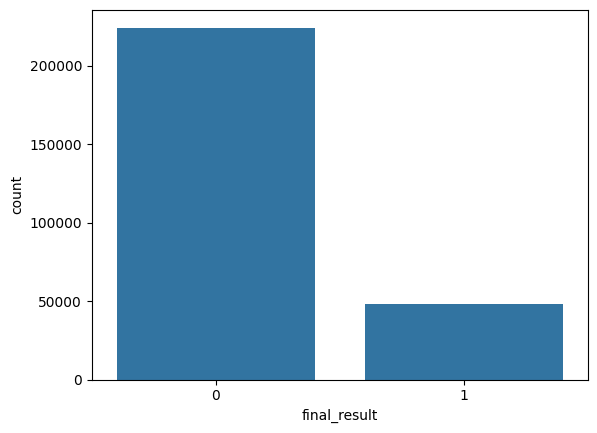

In [ ]:
sns.countplot(x='final_result', data=pivot_df)

In [ ]:
pivot_df['final_result'].value_counts()

final_result
0    21189
1     6985
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = pivot_df.drop(['id_student','code_module','code_presentation','final_result'], axis=1)
y = pivot_df['final_result'].values  # target variable

In [ ]:
X.columns = X.columns.astype(str)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
print(X.shape)
print(y.shape)

(28174, 304)
(28174,)


In [ ]:
print(X_train.shape)
print(y_train.shape)

(21130, 304)
(21130,)


In [ ]:
print(X_test.shape)
print(y_test.shape)

(7044, 304)
(7044,)


In [ ]:
X_train.head()

date,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,Cluster,-25.0,...,260.0,261.0,262.0,263.0,264.0,265.0,266.0,267.0,268.0,269.0
19861,1,0.263204,0,3.0,0,0,120,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2065,1,0.355816,1,6.0,0,1,120,0,0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17564,1,0.300129,1,6.0,0,0,60,1,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15171,1,0.347569,1,9.0,0,0,60,0,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
913,0,0.301198,1,2.0,0,0,180,0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

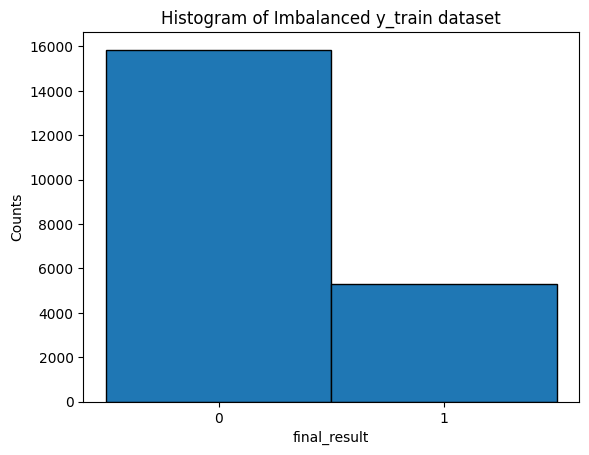

In [ ]:
plt.hist(y_train, bins=[-0.5, 0.5, 1.5], edgecolor='black')
plt.xticks([0, 1])
plt.xlabel('final_result')
plt.ylabel('Counts')
plt.title('Histogram of Imbalanced y_train dataset')
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# SMOTE(Synthetic Minority Oversampling Technique) is an oversampling technique where the synthetic samples are generated for the minority class.

In [ ]:
X_train_balanced.shape

(31712, 304)

In [ ]:
y_train_balanced.shape

(31712,)

In [ ]:
y_train_balanced

array([0, 0, 0, ..., 1, 1, 1])

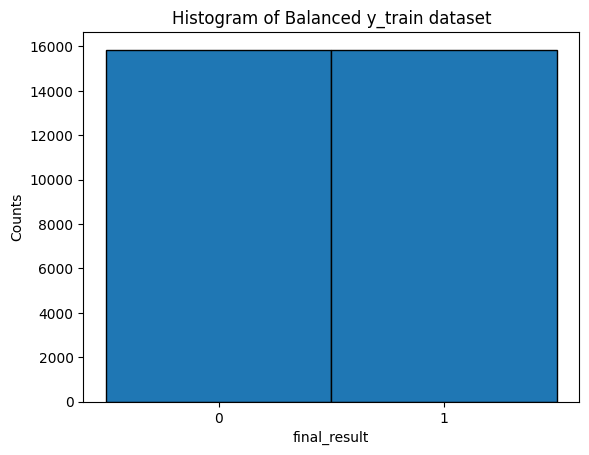

In [ ]:
plt.hist(y_train_balanced, bins=[-0.5, 0.5, 1.5], edgecolor='black')
plt.xticks([0, 1])
plt.xlabel('final_result')
plt.ylabel('Counts')
plt.title('Histogram of Balanced y_train dataset')
plt.show()

In [ ]:
X_train_balanced.head()

date,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,Cluster,-25.0,...,260.0,261.0,262.0,263.0,264.0,265.0,266.0,267.0,268.0,269.0
0,1,0.263204,0,3.0,0,0,120,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.355816,1,6.0,0,1,120,0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.300129,1,6.0,0,0,60,1,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.347569,1,9.0,0,0,60,0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.301198,1,2.0,0,0,180,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train_balanced

date,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,Cluster,-25.0,...,260.0,261.0,262.0,263.0,264.0,265.0,266.0,267.0,268.0,269.0
0,1,0.263204,0,3.000000,0,0,120,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.355816,1,6.000000,0,1,120,0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.300129,1,6.000000,0,0,60,1,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.347569,1,9.000000,0,0,60,0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.301198,1,2.000000,0,0,180,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31707,1,0.298328,1,1.602195,0,0,69,0,3.301097,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31708,0,0.300129,1,7.404291,0,0,60,0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31709,1,0.332437,1,0.279002,0,0,120,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31710,0,0.296769,0,3.300171,0,0,60,0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_train_balanced

array([0, 0, 0, ..., 1, 1, 1])

Train-test split (TSF)

In [ ]:
X_train_ts = X_train_balanced.drop(['gender','region','highest_education','imd_band','age_band','num_of_prev_attempts','studied_credits','disability','Cluster'], axis=1)

In [ ]:
X_train_ts.head()

date,-25.0,-24.0,-23.0,-22.0,-21.0,-20.0,-19.0,-18.0,-17.0,-16.0,...,260.0,261.0,262.0,263.0,264.0,265.0,266.0,267.0,268.0,269.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,103.0,66.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_train_ts = y_train_balanced

In [ ]:
X_test_ts = X_test.drop(['gender','region','highest_education','imd_band','age_band','num_of_prev_attempts','studied_credits','disability','Cluster'], axis=1)

In [ ]:
y_test_ts = y_test

In [ ]:
print(X_train_ts.shape)
print(y_train_ts.shape)
print(X_test_ts.shape)
print(y_test_ts.shape)

(31712, 295)
(31712,)
(7044, 295)
(7044,)


Train-test split: Demographic data

In [ ]:
X_train_demo = X_train_balanced[['gender','region','highest_education','imd_band','age_band','num_of_prev_attempts','studied_credits','disability','Cluster']]

In [ ]:
X_test_demo = X_test[['gender','region','highest_education','imd_band','age_band','num_of_prev_attempts','studied_credits','disability','Cluster']]

In [ ]:
y_train_demo = y_train_balanced

In [ ]:
y_test_demo = y_test

In [ ]:
print(X_train_demo.shape)
print(y_train_demo.shape)
print(X_test_demo.shape)
print(y_test_demo.shape)

(31712, 9)
(31712,)
(7044, 9)
(7044,)


# 5. Data Modeling (TSF + RF = Meta-model)

## 5.1) Time Series data (Interactive data) - Time Series Forest model (TSF)

In [ ]:
X_train_tsf = X_train_ts.values.reshape((X_train_ts.shape[0], 1, X_train_ts.shape[1]))
X_test_tsf = X_test_ts.values.reshape((X_test_ts.shape[0], 1, X_test_ts.shape[1]))

In [ ]:
X_train_tsf

array([[[0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.]]])

In [ ]:
y_train_tsf = pd.Series(y_train_ts)
y_test_tsf = pd.Series(y_test_ts)

In [ ]:
from sktime.classification.interval_based import TimeSeriesForestClassifier

tsf = TimeSeriesForestClassifier(n_estimators=100, random_state=42)
tsf.fit(X_train_tsf, y_train_tsf)

TimeSeriesForestClassifier(n_estimators=100, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

tsf_prediction = tsf.predict(X_test_tsf)
tsf_accuracy = accuracy_score(y_test_tsf, tsf_prediction)

In [ ]:
print(f"Test Accuracy: {accuracy_score(y_test_tsf, tsf_prediction) * 100:.2f}%")
print(classification_report(y_test_tsf, tsf_prediction))

Test Accuracy: 84.50%
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      5333
           1       0.63      0.88      0.73      1711

    accuracy                           0.84      7044
   macro avg       0.79      0.86      0.81      7044
weighted avg       0.88      0.84      0.85      7044



## 5.2) Feature Selection

### Prepare the dataset

In [ ]:
print(X_train_demo.shape)
print(y_train_demo.shape)
print(X_test_demo.shape)
print(y_test_demo.shape)

(31712, 9)
(31712,)
(7044, 9)
(7044,)


### Feature Selection

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the RandomForest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_demo, y_train_demo)

# Get feature importances
importances = model.feature_importances_

# Sort the features by importance
sorted_indices = np.argsort(importances)[::-1]

In [ ]:
# Get feature importances
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X_train_demo.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

# Print the DataFrame containing feature importances
print(feature_importances)

                      importance
date                            
region                  0.389087
imd_band                0.299038
studied_credits         0.079788
highest_education       0.054633
age_band                0.047094
Cluster                 0.044651
num_of_prev_attempts    0.037251
gender                  0.028317
disability              0.020140


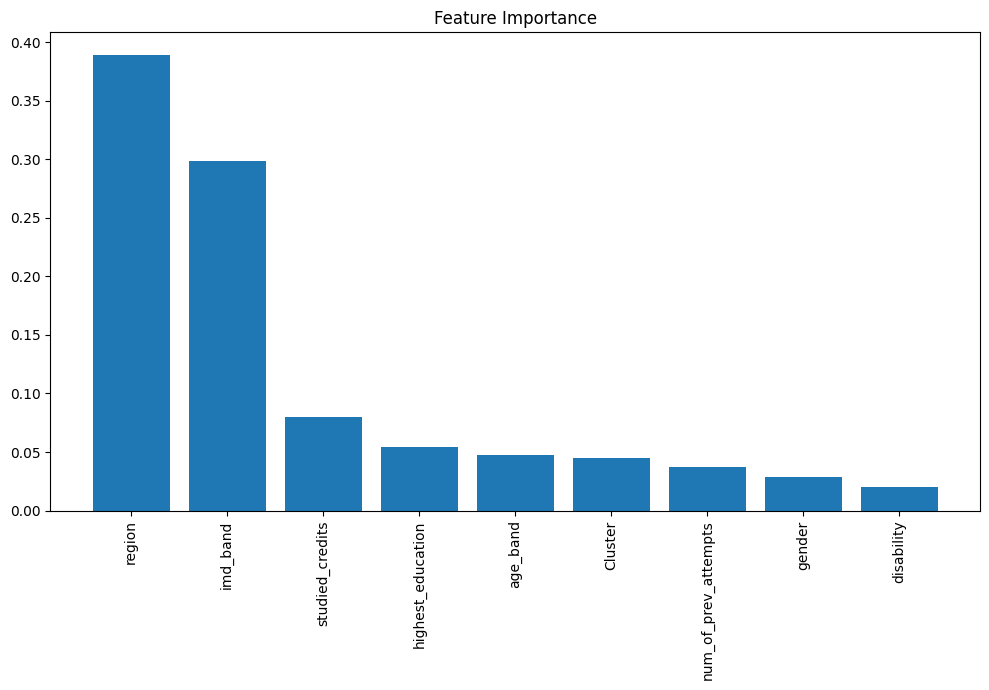

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title('Feature Importance')
plt.bar(range(X_train_demo.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train_demo.shape[1]), X_train_demo.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

#### Logistic Regression

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Logistic regression as an example model
log_reg = LogisticRegression()

rfe = RFE(estimator=log_reg, n_features_to_select=5)  # Select top 3 features
rfe.fit(X_train_demo, y_train_demo)

# Summarize selected features
selected_features_df = pd.DataFrame({
    'Feature': X_train_demo.columns,
    'Selected': rfe.support_,
    'Ranking': rfe.ranking_
})

print(selected_features_df[selected_features_df['Selected'] == True])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                Feature  Selected  Ranking
0                gender      True        1
1                region      True        1
4              age_band      True        1
5  num_of_prev_attempts      True        1
7            disability      True        1


#### Chi-squared Test

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


# Applying the Chi-Squared Test
# Create and fit selector
chi2_selector = SelectKBest(chi2, k='all')  # 'all' can be replaced with any numeric value if you want to limit the number of features
X_kbest_features = chi2_selector.fit_transform(X_train_demo, y_train_demo)

# See the scores for each feature
chi_scores = chi2_selector.scores_

# Create a DataFrame with the scores and corresponding feature names
features_scores = pd.DataFrame({'Feature': X_train_demo.columns, 'Score': chi_scores})
features_scores = features_scores.sort_values(by='Score', ascending=False)

# Display the features with their chi2 scores
print(features_scores)

                Feature         Score
6       studied_credits  16359.653932
4              age_band    995.461731
3              imd_band    422.296059
2     highest_education    309.048095
7            disability    162.222023
5  num_of_prev_attempts    143.660317
8               Cluster    123.716936
0                gender    118.321699
1                region      0.492534


In [ ]:
X_train_demo['Cluster'] = X_train_demo['Cluster'].astype(int)
X_test_demo['Cluster'] = X_test_demo['Cluster'].astype(int)

<ipython-input-85-fafc39c6ae4d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_demo['Cluster'] = X_train_demo['Cluster'].astype(int)
<ipython-input-85-fafc39c6ae4d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_demo['Cluster'] = X_test_demo['Cluster'].astype(int)


#### XGBoost

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.datasets import load_breast_cancer

# Initialize and train the XGBoost classifier
model = XGBClassifier()
model.fit(X_train_demo, y_train_demo)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

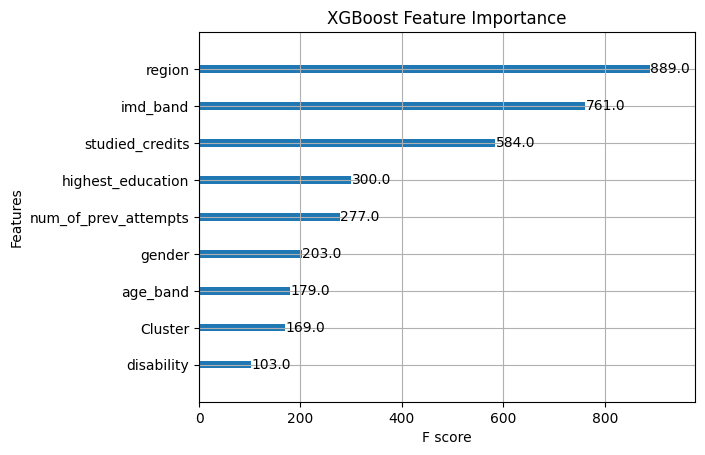

In [ ]:
# Plot feature importances
xgb.plot_importance(model)
plt.title("XGBoost Feature Importance")
plt.show()

#### Select Features

In [ ]:
X_train_xgb = X_train_demo[['region','imd_band','studied_credits','num_of_prev_attempts','highest_education', 'Cluster']]

In [ ]:
X_test_xgb = X_test_demo[['region','imd_band','studied_credits','num_of_prev_attempts','highest_education', 'Cluster']]

In [ ]:
y_train_xgb = y_train_demo

In [ ]:
y_test_xgb = y_test_demo

In [ ]:
print(X_train_xgb.shape)
print(y_train_xgb.shape)
print(X_test_xgb.shape)
print(y_test_xgb.shape)

(31712, 6)
(31712,)
(7044, 6)
(7044,)


## 5.3) Demographic data modeling

In [ ]:
global xgb_model
X_train_xgb = X_train_demo[['region','imd_band','studied_credits','num_of_prev_attempts','highest_education', 'Cluster']]
X_test_xgb = X_test_demo[['region','imd_band','studied_credits','num_of_prev_attempts','highest_education', 'Cluster']]
y_train_xgb = y_train_demo
y_test_xgb = y_test_demo

xgb_model = xgb.XGBClassifier(
    max_depth=3,          # maximum depth of each tree
    n_estimators=100,     # number of trees
    learning_rate=0.05,    # learning rate
    use_label_encoder=False,  # to avoid a deprecation warning from XGBoost regarding label encoding
    eval_metric='mlogloss'  # evaluation metric for multiclass classification
)
xgb_model.fit(X_train_xgb, y_train_xgb)

# Predictions
xgb_prediction = xgb_model.predict(X_test_xgb)

# Evaluation
accuracy = accuracy_score(y_test_xgb, xgb_prediction)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))
print(classification_report(y_test_xgb, xgb_prediction))

Test Accuracy: 72.80%
              precision    recall  f1-score   support

           0       0.77      0.90      0.83      5333
           1       0.37      0.18      0.24      1711

    accuracy                           0.73      7044
   macro avg       0.57      0.54      0.54      7044
weighted avg       0.68      0.73      0.69      7044



In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_xgb, y_train_xgb)

# Predict on the test set
rf_predictions = rf_model.predict(X_test_xgb)

# Evaluate the model
print(f"Test Accuracy: {accuracy_score(y_test_xgb, rf_predictions) * 100:.2f}%")
print(classification_report(y_test_xgb, rf_predictions))

Test Accuracy: 72.60%
              precision    recall  f1-score   support

           0       0.77      0.92      0.84      5333
           1       0.34      0.13      0.19      1711

    accuracy                           0.73      7044
   macro avg       0.55      0.52      0.51      7044
weighted avg       0.66      0.73      0.68      7044



## 5.4) Meta-model combining two previous models

In [ ]:
from scipy.stats import mode

# Simple majority vote
final_predictions = mode(np.column_stack((tsf_prediction, xgb_prediction)), axis=1)[0]

In [ ]:
# Assuming the predictions are probabilities or continuous scores
ts_probs = tsf.predict_proba(X_test_ts)[:, 1]  # Get probability of class 1
xgb_probs = xgb_model.predict_proba(X_test_xgb)[:, 1]

In [ ]:
meta_features_logi = np.column_stack((ts_probs, xgb_probs))

In [ ]:
from sklearn.linear_model import LogisticRegression
meta_model_logi = LogisticRegression()
meta_model_logi.fit(meta_features_logi, y_test_ts)

LogisticRegression()

In [ ]:
meta_predictions_logi = meta_model_logi.predict(meta_features_logi)

In [ ]:
accuracy = accuracy_score(y_test_ts, meta_predictions_logi)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test_ts, meta_predictions_logi))

Accuracy: 85.18%
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      5333
           1       0.68      0.74      0.71      1711

    accuracy                           0.85      7044
   macro avg       0.80      0.81      0.80      7044
weighted avg       0.86      0.85      0.85      7044



In [ ]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test_ts, meta_predictions_logi)
cnf_matrix

array([[4735,  598],
       [ 446, 1265]])

Text(0.5, 427.9555555555555, 'Predicted label')

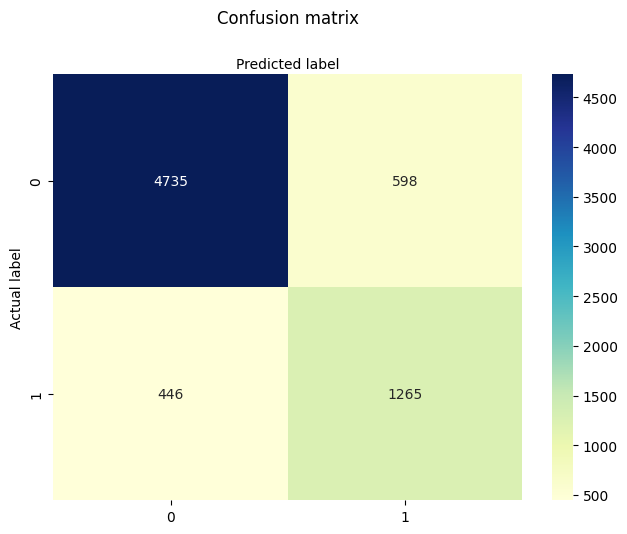

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

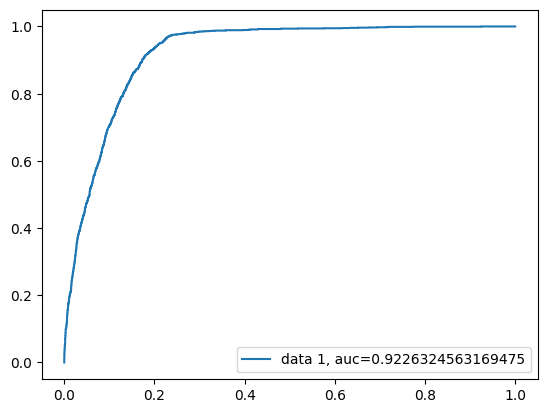

In [ ]:
y_pred_proba = meta_model_logi.predict_proba(meta_features_logi)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_ts, y_pred_proba)
auc = metrics.roc_auc_score(y_test_ts, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# 6. Early Dropout

In [ ]:
X_train_ts = X_train_balanced.drop(['gender','region','highest_education','imd_band','age_band','num_of_prev_attempts','studied_credits','disability','Cluster'], axis=1)
X_test_ts = X_test.drop(['gender','region','highest_education','imd_band','age_band','num_of_prev_attempts','studied_credits','disability','Cluster'], axis=1)
y_train_ts = y_train_balanced
y_test_ts = y_test

In [ ]:
print(X_train_ts.shape)
print(y_train_ts.shape)
print(X_test_ts.shape)
print(y_test_ts.shape)

(31712, 295)
(31712,)
(7044, 295)
(7044,)


In [ ]:
X_train_ts.columns = X_train_ts.columns.astype(float).astype(int)
X_test_ts.columns = X_test_ts.columns.astype(float).astype(int)

In [ ]:
X_train_ts.head()

date,-25,-24,-23,-22,-21,-20,-19,-18,-17,-16,...,260,261,262,263,264,265,266,267,268,269
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,103.0,66.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_test_ts

date,-25,-24,-23,-22,-21,-20,-19,-18,-17,-16,...,260,261,262,263,264,265,266,267,268,269
5908,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8184,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8482,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,143.0,16.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_test_ts

array([0, 0, 0, ..., 0, 1, 1])

In [ ]:
# Convert y_train_ts and y_test_ts to DataFrame and rename the column to 'final_result'
y_train_col = pd.DataFrame(y_train_ts, columns=['final_result'])
y_test_col = pd.DataFrame(y_test_ts, columns=['final_result'])

X_train_reset = X_train_ts.reset_index(drop=True)
y_train_reset = y_train_col.reset_index(drop=True)

X_test_reset = X_test_ts.reset_index(drop=True)
y_test_reset = y_test_col.reset_index(drop=True)

# Concatenate the features and target for training set
train_combined = pd.concat([X_train_reset, y_train_reset], axis=1)

# Concatenate the features and target for testing set
test_combined = pd.concat([X_test_reset, y_test_reset], axis=1)

# Verify the shapes and columns
print(train_combined.shape)
print(train_combined.columns)
print(test_combined.shape)
print(test_combined.columns)

(31712, 296)
Index([           -25,            -24,            -23,            -22,
                  -21,            -20,            -19,            -18,
                  -17,            -16,
       ...
                  261,            262,            263,            264,
                  265,            266,            267,            268,
                  269, 'final_result'],
      dtype='object', length=296)
(7044, 296)
Index([           -25,            -24,            -23,            -22,
                  -21,            -20,            -19,            -18,
                  -17,            -16,
       ...
                  261,            262,            263,            264,
                  265,            266,            267,            268,
                  269, 'final_result'],
      dtype='object', length=296)


In [ ]:
train_combined.head()

,-25,-24,-23,-22,-21,-20,-19,-18,-17,-16,...,261,262,263,264,265,266,267,268,269,final_result
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,103.0,66.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
test_combined.head()

,-25,-24,-23,-22,-21,-20,-19,-18,-17,-16,...,261,262,263,264,265,266,267,268,269,final_result
0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [ ]:
# Manually creating each subset
train_1 = train_combined[['final_result'] + [x for x in range(-25, 0) if x in train_combined.columns]]
train_2 = train_combined[['final_result'] + [x for x in range(-25, 30) if x in train_combined.columns]]
train_3 = train_combined[['final_result'] + [x for x in range(-25, 60) if x in train_combined.columns]]
train_4 = train_combined[['final_result'] + [x for x in range(-25, 90) if x in train_combined.columns]]
train_5 = train_combined[['final_result'] + [x for x in range(-25, 120) if x in train_combined.columns]]
train_6 = train_combined[['final_result'] + [x for x in range(-25, 150) if x in train_combined.columns]]
train_7 = train_combined[['final_result'] + [x for x in range(-25, 180) if x in train_combined.columns]]
train_8 = train_combined[['final_result'] + [x for x in range(-25, 210) if x in train_combined.columns]]
train_9 = train_combined[['final_result'] + [x for x in range(-25, 240) if x in train_combined.columns]]
train_10 = train_combined[['final_result'] + [x for x in range(-25, 270) if x in train_combined.columns]]

In [ ]:
train_1.head()

,final_result,-25,-24,-23,-22,-21,-20,-19,-18,-17,...,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,103.0,66.0,...,11.0,12.0,0.0,61.0,4.0,21.0,39.0,21.0,99.0,106.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,154.0,14.0,59.0,0.0,0.0,61.0,0.0,0.0,12.0,18.0
4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train_ts_1 = train_1.drop(['final_result'], axis=1)
y_train_ts_1 = train_1['final_result']

X_train_ts_2 = train_2.drop(['final_result'], axis=1)
y_train_ts_2 = train_2['final_result']

X_train_ts_3 = train_3.drop(['final_result'], axis=1)
y_train_ts_3 = train_3['final_result']

X_train_ts_4 = train_4.drop(['final_result'], axis=1)
y_train_ts_4 = train_4['final_result']

X_train_ts_5 = train_5.drop(['final_result'], axis=1)
y_train_ts_5 = train_5['final_result']

X_train_ts_6 = train_6.drop(['final_result'], axis=1)
y_train_ts_6 = train_6['final_result']

X_train_ts_7 = train_7.drop(['final_result'], axis=1)
y_train_ts_7 = train_7['final_result']

X_train_ts_8 = train_8.drop(['final_result'], axis=1)
y_train_ts_8 = train_8['final_result']

X_train_ts_9 = train_9.drop(['final_result'], axis=1)
y_train_ts_9 = train_9['final_result']

X_train_ts_10 = train_10.drop(['final_result'], axis=1)
y_train_ts_10 = train_10['final_result']

In [ ]:
# Manually creating each subset
test_1 = test_combined[['final_result'] + [x for x in range(-25, 0) if x in test_combined.columns]]
test_2 = test_combined[['final_result'] + [x for x in range(-25, 30) if x in test_combined.columns]]
test_3 = test_combined[['final_result'] + [x for x in range(-25, 60) if x in test_combined.columns]]
test_4 = test_combined[['final_result'] + [x for x in range(-25, 90) if x in test_combined.columns]]
test_5 = test_combined[['final_result'] + [x for x in range(-25, 120) if x in test_combined.columns]]
test_6 = test_combined[['final_result'] + [x for x in range(-25, 150) if x in test_combined.columns]]
test_7 = test_combined[['final_result'] + [x for x in range(-25, 180) if x in test_combined.columns]]
test_8 = test_combined[['final_result'] + [x for x in range(-25, 210) if x in test_combined.columns]]
test_9 = test_combined[['final_result'] + [x for x in range(-25, 240) if x in test_combined.columns]]
test_10 = test_combined[['final_result'] + [x for x in range(-25, 270) if x in test_combined.columns]]

In [ ]:
X_test_ts_1 = test_1.drop(['final_result'], axis=1)
y_test_ts_1 = test_1['final_result']

X_test_ts_2 = test_2.drop(['final_result'], axis=1)
y_test_ts_2 = test_2['final_result']

X_test_ts_3 = test_3.drop(['final_result'], axis=1)
y_test_ts_3 = test_3['final_result']

X_test_ts_4 = test_4.drop(['final_result'], axis=1)
y_test_ts_4 = test_4['final_result']

X_test_ts_5 = test_5.drop(['final_result'], axis=1)
y_test_ts_5 = test_5['final_result']

X_test_ts_6 = test_6.drop(['final_result'], axis=1)
y_test_ts_6 = test_6['final_result']

X_test_ts_7 = test_7.drop(['final_result'], axis=1)
y_test_ts_7 = test_7['final_result']

X_test_ts_8 = test_8.drop(['final_result'], axis=1)
y_test_ts_8 = test_8['final_result']

X_test_ts_9 = test_9.drop(['final_result'], axis=1)
y_test_ts_9 = test_9['final_result']

X_test_ts_10 = test_10.drop(['final_result'], axis=1)
y_test_ts_10 = test_10['final_result']

In [ ]:
test_1.head()

,final_result,-25,-24,-23,-22,-21,-20,-19,-18,-17,...,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1
0,0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,...,0.0,0.0,0.0,0.0,31.0,3.0,10.0,13.0,105.0,6.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,27.0,0.0,0.0,0.0,0.0,6.0,0.0,47.0,7.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.0,23.0,27.0,0.0,6.0,21.0,0.0,0.0,0.0,16.0
3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(X_train_ts_1.shape)
print(y_train_ts_1.shape)
print(X_test_ts_1.shape)
print(y_test_ts_1.shape)
print(X_train_xgb.shape)
print(y_train_xgb.shape)
print(X_test_xgb.shape)
print(y_test_xgb.shape)

(31712, 25)
(31712,)
(7044, 25)
(7044,)
(31712, 6)
(31712,)
(7044, 6)
(7044,)


In [ ]:
print(X_train_ts_2.shape)
print(y_train_ts_2.shape)
print(X_test_ts_2.shape)
print(y_test_ts_2.shape)

(31712, 55)
(31712,)
(7044, 55)
(7044,)


1st Iteration

In [ ]:
X_train_tsf_1 = X_train_ts_1.values.reshape((X_train_ts_1.shape[0], 1, X_train_ts_1.shape[1]))
X_test_tsf_1 = X_test_ts_1.values.reshape((X_test_ts_1.shape[0], 1, X_test_ts_1.shape[1]))

y_train_tsf_1 = pd.Series(y_train_ts_1)
y_test_tsf_1 = pd.Series(y_test_ts_1)

tsf_1 = TimeSeriesForestClassifier(n_estimators=100, random_state=42)
tsf_1.fit(X_train_tsf_1, y_train_tsf_1)

tsf_prediction_1 = tsf_1.predict(X_test_tsf_1)
tsf_accuracy_1 = accuracy_score(y_test_tsf_1, tsf_prediction_1)

print(f"Test Accuracy: {accuracy_score(y_test_tsf_1, tsf_prediction_1) * 100:.2f}%")
print(classification_report(y_test_tsf_1, tsf_prediction_1))

Test Accuracy: 73.68%
              precision    recall  f1-score   support

           0       0.76      0.95      0.84      5333
           1       0.33      0.08      0.13      1711

    accuracy                           0.74      7044
   macro avg       0.55      0.51      0.49      7044
weighted avg       0.66      0.74      0.67      7044



In [ ]:
ts_probs_1 = tsf_1.predict_proba(X_test_tsf_1)[:, 1]  # Get probability of class 1
xgb_probs = xgb_model.predict_proba(X_test_xgb)[:, 1]
meta_features_logi_1 = np.column_stack((ts_probs_1, xgb_probs))
meta_model_logi_1 = LogisticRegression()
meta_model_logi_1.fit(meta_features_logi_1, y_test_ts_1)
meta_predictions_logi_1 = meta_model_logi_1.predict(meta_features_logi_1)

final_accuracy_1 = accuracy_score(y_test_ts_1, meta_predictions_logi_1)
print(f"Accuracy: {final_accuracy_1 * 100:.2f}%")
print(classification_report(y_test_ts_1, meta_predictions_logi_1))

Accuracy: 75.64%
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      5333
           1       0.27      0.00      0.00      1711

    accuracy                           0.76      7044
   macro avg       0.51      0.50      0.43      7044
weighted avg       0.64      0.76      0.65      7044



In [ ]:
y_pred_proba_1 = meta_model_logi_1.predict_proba(meta_features_logi_1)[::,1]
auc_1 = metrics.roc_auc_score(y_test_ts_1, y_pred_proba_1)
auc_1

0.6087887981309761

2nd Iteration

In [ ]:
X_train_tsf_2 = X_train_ts_2.values.reshape((X_train_ts_2.shape[0], 1, X_train_ts_2.shape[1]))
X_test_tsf_2 = X_test_ts_2.values.reshape((X_test_ts_2.shape[0], 1, X_test_ts_2.shape[1]))

y_train_tsf_2 = pd.Series(y_train_ts_2)
y_test_tsf_2 = pd.Series(y_test_ts_2)

tsf_2 = TimeSeriesForestClassifier(n_estimators=100, random_state=42)
tsf_2.fit(X_train_tsf_2, y_train_tsf_2)

tsf_prediction_2 = tsf_2.predict(X_test_tsf_2)
tsf_accuracy_2 = accuracy_score(y_test_tsf_2, tsf_prediction_2)

print(f"Test Accuracy: {accuracy_score(y_test_tsf_2, tsf_prediction_2) * 100:.2f}%")
print(classification_report(y_test_tsf_2, tsf_prediction_2))

Test Accuracy: 76.86%
              precision    recall  f1-score   support

           0       0.79      0.94      0.86      5333
           1       0.56      0.23      0.32      1711

    accuracy                           0.77      7044
   macro avg       0.67      0.59      0.59      7044
weighted avg       0.74      0.77      0.73      7044



In [ ]:
ts_probs_2 = tsf_2.predict_proba(X_test_tsf_2)[:, 1]  # Get probability of class 1
xgb_probs = xgb_model.predict_proba(X_test_xgb)[:, 1]
meta_features_logi_2 = np.column_stack((ts_probs_2, xgb_probs))
meta_model_logi_2 = LogisticRegression()
meta_model_logi_2.fit(meta_features_logi_2, y_test_ts_2)
meta_predictions_logi_2 = meta_model_logi_2.predict(meta_features_logi_2)

final_accuracy_2 = accuracy_score(y_test_ts_2, meta_predictions_logi_2)
print(f"Accuracy: {final_accuracy_2 * 100:.2f}%")
print(classification_report(y_test_ts_2, meta_predictions_logi_2))

Accuracy: 77.87%
              precision    recall  f1-score   support

           0       0.78      0.98      0.87      5333
           1       0.74      0.14      0.23      1711

    accuracy                           0.78      7044
   macro avg       0.76      0.56      0.55      7044
weighted avg       0.77      0.78      0.72      7044



In [ ]:
y_pred_proba_2 = meta_model_logi_2.predict_proba(meta_features_logi_2)[::,1]
auc_2 = metrics.roc_auc_score(y_test_ts_2, y_pred_proba_2)
auc_2

0.6558040466366085

3rd Iteratioin

In [ ]:
X_train_tsf_3 = X_train_ts_3.values.reshape((X_train_ts_3.shape[0], 1, X_train_ts_3.shape[1]))
X_test_tsf_3 = X_test_ts_3.values.reshape((X_test_ts_3.shape[0], 1, X_test_ts_3.shape[1]))

y_train_tsf_3 = pd.Series(y_train_ts_3)
y_test_tsf_3 = pd.Series(y_test_ts_3)

tsf_3 = TimeSeriesForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
tsf_3.fit(X_train_tsf_3, y_train_tsf_3)

tsf_prediction_3 = tsf_3.predict(X_test_tsf_3)
tsf_accuracy_3 = accuracy_score(y_test_tsf_3, tsf_prediction_3)

print(f"Test Accuracy: {accuracy_score(y_test_tsf_3, tsf_prediction_3) * 100:.2f}%")
print(classification_report(y_test_tsf_3, tsf_prediction_3))

Test Accuracy: 78.83%
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      5333
           1       0.59      0.42      0.49      1711

    accuracy                           0.79      7044
   macro avg       0.71      0.66      0.68      7044
weighted avg       0.77      0.79      0.78      7044



In [ ]:
ts_probs_3 = tsf_3.predict_proba(X_test_tsf_3)[:, 1]  # Get probability of class 1
xgb_probs = xgb_model.predict_proba(X_test_xgb)[:, 1]
meta_features_logi_3 = np.column_stack((ts_probs_3, xgb_probs))
meta_model_logi_3 = LogisticRegression()
meta_model_logi_3.fit(meta_features_logi_3, y_test_ts_3)
meta_predictions_logi_3 = meta_model_logi_3.predict(meta_features_logi_3)

final_accuracy_3 = accuracy_score(y_test_ts_3, meta_predictions_logi_3)
print(f"Accuracy: {final_accuracy_3 * 100:.2f}%")
print(classification_report(y_test_ts_3, meta_predictions_logi_3))

Accuracy: 80.47%
              precision    recall  f1-score   support

           0       0.82      0.96      0.88      5333
           1       0.72      0.32      0.45      1711

    accuracy                           0.80      7044
   macro avg       0.77      0.64      0.66      7044
weighted avg       0.79      0.80      0.78      7044



In [ ]:
y_pred_proba_3 = meta_model_logi_3.predict_proba(meta_features_logi_3)[::,1]
auc_3 = metrics.roc_auc_score(y_test_ts_3, y_pred_proba_3)
auc_3

0.731328693139756

4th Iteratioin

In [ ]:
X_train_tsf_4 = X_train_ts_4.values.reshape((X_train_ts_4.shape[0], 1, X_train_ts_4.shape[1]))
X_test_tsf_4 = X_test_ts_4.values.reshape((X_test_ts_4.shape[0], 1, X_test_ts_4.shape[1]))

y_train_tsf_4 = pd.Series(y_train_ts_4)
y_test_tsf_4 = pd.Series(y_test_ts_4)

tsf_4 = TimeSeriesForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
tsf_4.fit(X_train_tsf_4, y_train_tsf_4)

tsf_prediction_4 = tsf_4.predict(X_test_tsf_4)
tsf_accuracy_4 = accuracy_score(y_test_tsf_4, tsf_prediction_4)

print(f"Test Accuracy: {accuracy_score(y_test_tsf_4, tsf_prediction_4) * 100:.2f}%")
print(classification_report(y_test_tsf_4, tsf_prediction_4))

Test Accuracy: 80.27%
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      5333
           1       0.61      0.52      0.56      1711

    accuracy                           0.80      7044
   macro avg       0.73      0.71      0.72      7044
weighted avg       0.79      0.80      0.80      7044



In [ ]:
ts_probs_4 = tsf_4.predict_proba(X_test_tsf_4)[:, 1]  # Get probability of class 1
xgb_probs = xgb_model.predict_proba(X_test_xgb)[:, 1]
meta_features_logi_4 = np.column_stack((ts_probs_4, xgb_probs))
meta_model_logi_4 = LogisticRegression()
meta_model_logi_4.fit(meta_features_logi_4, y_test_ts_4)
meta_predictions_logi_4 = meta_model_logi_4.predict(meta_features_logi_4)

final_accuracy_4 = accuracy_score(y_test_ts_4, meta_predictions_logi_4)
print(f"Accuracy: {final_accuracy_4 * 100:.2f}%")
print(classification_report(y_test_ts_4, meta_predictions_logi_4))

Accuracy: 81.73%
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      5333
           1       0.71      0.42      0.53      1711

    accuracy                           0.82      7044
   macro avg       0.77      0.68      0.71      7044
weighted avg       0.80      0.82      0.80      7044



In [ ]:
y_pred_proba_4 = meta_model_logi_4.predict_proba(meta_features_logi_4)[::,1]
auc_4 = metrics.roc_auc_score(y_test_ts_4, y_pred_proba_4)
auc_4

0.7764777561893936

5th Iteratioin

In [ ]:
X_train_tsf_5 = X_train_ts_5.values.reshape((X_train_ts_5.shape[0], 1, X_train_ts_5.shape[1]))
X_test_tsf_5 = X_test_ts_5.values.reshape((X_test_ts_5.shape[0], 1, X_test_ts_5.shape[1]))

y_train_tsf_5 = pd.Series(y_train_ts_5)
y_test_tsf_5 = pd.Series(y_test_ts_5)

tsf_5 = TimeSeriesForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
tsf_5.fit(X_train_tsf_5, y_train_tsf_5)

tsf_prediction_5 = tsf_5.predict(X_test_tsf_5)
tsf_accuracy_5 = accuracy_score(y_test_tsf_5, tsf_prediction_5)

print(f"Test Accuracy: {accuracy_score(y_test_tsf_5, tsf_prediction_5) * 100:.2f}%")
print(classification_report(y_test_tsf_5, tsf_prediction_5))

Test Accuracy: 82.21%
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      5333
           1       0.63      0.65      0.64      1711

    accuracy                           0.82      7044
   macro avg       0.76      0.76      0.76      7044
weighted avg       0.82      0.82      0.82      7044



In [ ]:
ts_probs_5 = tsf_5.predict_proba(X_test_tsf_5)[:, 1]  # Get probability of class 1
xgb_probs = xgb_model.predict_proba(X_test_xgb)[:, 1]
meta_features_logi_5 = np.column_stack((ts_probs_5, xgb_probs))
meta_model_logi_5 = LogisticRegression()
meta_model_logi_5.fit(meta_features_logi_5, y_test_ts_5)
meta_predictions_logi_5 = meta_model_logi_5.predict(meta_features_logi_5)

final_accuracy_5 = accuracy_score(y_test_ts_5, meta_predictions_logi_5)
final_classification_report_5 = classification_report(y_test_ts_5, meta_predictions_logi_5)

print(f"Accuracy: {final_accuracy_5 * 100:.2f}%")
print(final_classification_report_5)

Accuracy: 83.42%
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      5333
           1       0.70      0.55      0.62      1711

    accuracy                           0.83      7044
   macro avg       0.78      0.74      0.76      7044
weighted avg       0.83      0.83      0.83      7044



In [ ]:
y_pred_proba_5 = meta_model_logi_5.predict_proba(meta_features_logi_5)[::,1]
auc_5 = metrics.roc_auc_score(y_test_ts_5, y_pred_proba_5)
auc_5

0.8386749332558008

6th Iteration

In [ ]:
X_train_tsf_6 = X_train_ts_6.values.reshape((X_train_ts_6.shape[0], 1, X_train_ts_6.shape[1]))
X_test_tsf_6 = X_test_ts_6.values.reshape((X_test_ts_6.shape[0], 1, X_test_ts_6.shape[1]))

y_train_tsf_6 = pd.Series(y_train_ts_6)
y_test_tsf_6 = pd.Series(y_test_ts_6)

tsf_6 = TimeSeriesForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
tsf_6.fit(X_train_tsf_6, y_train_tsf_6)

tsf_prediction_6 = tsf_6.predict(X_test_tsf_6)
tsf_accuracy_6 = accuracy_score(y_test_tsf_6, tsf_prediction_6)
tsf_classification_report_6 = classification_report(y_test_tsf_6, tsf_prediction_6)

print(f"Test Accuracy: {tsf_accuracy_6 * 100:.2f}%")
print(tsf_classification_report_6)

Test Accuracy: 82.99%
              precision    recall  f1-score   support

           0       0.91      0.86      0.88      5333
           1       0.63      0.74      0.68      1711

    accuracy                           0.83      7044
   macro avg       0.77      0.80      0.78      7044
weighted avg       0.84      0.83      0.83      7044



In [ ]:
ts_probs_6 = tsf_6.predict_proba(X_test_tsf_6)[:, 1]  # Get probability of class 1
xgb_probs = xgb_model.predict_proba(X_test_xgb)[:, 1]
meta_features_logi_6 = np.column_stack((ts_probs_6, xgb_probs))
meta_model_logi_6 = LogisticRegression()
meta_model_logi_6.fit(meta_features_logi_6, y_test_ts_6)
meta_predictions_logi_6 = meta_model_logi_6.predict(meta_features_logi_6)

final_accuracy_6 = accuracy_score(y_test_ts_6, meta_predictions_logi_6)
final_classification_report_6 = classification_report(y_test_ts_6, meta_predictions_logi_6)

print(f"Accuracy: {final_accuracy_6 * 100:.2f}%")
print(final_classification_report_6)

Accuracy: 84.09%
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      5333
           1       0.69      0.63      0.66      1711

    accuracy                           0.84      7044
   macro avg       0.79      0.77      0.78      7044
weighted avg       0.84      0.84      0.84      7044



In [ ]:
y_pred_proba_6 = meta_model_logi_6.predict_proba(meta_features_logi_6)[::,1]
auc_6 = metrics.roc_auc_score(y_test_ts_6, y_pred_proba_6)
auc_6

0.8702799185030887

7th Iteration

In [ ]:
X_train_tsf_7 = X_train_ts_7.values.reshape((X_train_ts_7.shape[0], 1, X_train_ts_7.shape[1]))
X_test_tsf_7 = X_test_ts_7.values.reshape((X_test_ts_7.shape[0], 1, X_test_ts_7.shape[1]))

y_train_tsf_7 = pd.Series(y_train_ts_7)
y_test_tsf_7 = pd.Series(y_test_ts_7)

tsf_7 = TimeSeriesForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
tsf_7.fit(X_train_tsf_7, y_train_tsf_7)

tsf_prediction_7 = tsf_7.predict(X_test_tsf_7)
tsf_accuracy_7 = accuracy_score(y_test_tsf_7, tsf_prediction_7)
tsf_classification_report_7 = classification_report(y_test_tsf_7, tsf_prediction_7)

print(f"Test Accuracy: {tsf_accuracy_7 * 100:.2f}%")
print(tsf_classification_report_7)

Test Accuracy: 83.55%
              precision    recall  f1-score   support

           0       0.93      0.85      0.89      5333
           1       0.63      0.80      0.70      1711

    accuracy                           0.84      7044
   macro avg       0.78      0.82      0.79      7044
weighted avg       0.86      0.84      0.84      7044



In [ ]:
ts_probs_7 = tsf_7.predict_proba(X_test_tsf_7)[:, 1]  # Get probability of class 1
xgb_probs = xgb_model.predict_proba(X_test_xgb)[:, 1]
meta_features_logi_7 = np.column_stack((ts_probs_7, xgb_probs))
meta_model_logi_7 = LogisticRegression()
meta_model_logi_7.fit(meta_features_logi_7, y_test_ts_7)
meta_predictions_logi_7 = meta_model_logi_7.predict(meta_features_logi_7)

final_accuracy_7 = accuracy_score(y_test_ts_7, meta_predictions_logi_7)
final_classification_report_7 = classification_report(y_test_ts_7, meta_predictions_logi_7)

print(f"Accuracy: {final_accuracy_7 * 100:.2f}%")
print(final_classification_report_7)

Accuracy: 84.44%
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      5333
           1       0.68      0.67      0.68      1711

    accuracy                           0.84      7044
   macro avg       0.79      0.79      0.79      7044
weighted avg       0.84      0.84      0.84      7044



In [ ]:
y_pred_proba_7 = meta_model_logi_7.predict_proba(meta_features_logi_7)[::,1]
auc_7 = metrics.roc_auc_score(y_test_ts_7, y_pred_proba_7)
auc_7

0.8902330394772993

8th Iteration

In [ ]:
X_train_tsf_8 = X_train_ts_8.values.reshape((X_train_ts_8.shape[0], 1, X_train_ts_8.shape[1]))
X_test_tsf_8 = X_test_ts_8.values.reshape((X_test_ts_8.shape[0], 1, X_test_ts_8.shape[1]))

y_train_tsf_8 = pd.Series(y_train_ts_8)
y_test_tsf_8 = pd.Series(y_test_ts_8)

tsf_8 = TimeSeriesForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
tsf_8.fit(X_train_tsf_8, y_train_tsf_8)

tsf_prediction_8 = tsf_8.predict(X_test_tsf_8)
tsf_accuracy_8 = accuracy_score(y_test_tsf_8, tsf_prediction_8)
tsf_classification_report_8 = classification_report(y_test_tsf_8, tsf_prediction_8)

print(f"Test Accuracy: {tsf_accuracy_8 * 100:.2f}%")
print(tsf_classification_report_8)

Test Accuracy: 83.93%
              precision    recall  f1-score   support

           0       0.94      0.84      0.89      5333
           1       0.63      0.84      0.72      1711

    accuracy                           0.84      7044
   macro avg       0.78      0.84      0.80      7044
weighted avg       0.87      0.84      0.85      7044



In [ ]:
ts_probs_8 = tsf_8.predict_proba(X_test_tsf_8)[:, 1]  # Get probability of class 1
xgb_probs = xgb_model.predict_proba(X_test_xgb)[:, 1]
meta_features_logi_8 = np.column_stack((ts_probs_8, xgb_probs))
meta_model_logi_8 = LogisticRegression()
meta_model_logi_8.fit(meta_features_logi_8, y_test_ts_8)
meta_predictions_logi_8 = meta_model_logi_8.predict(meta_features_logi_8)

final_accuracy_8 = accuracy_score(y_test_ts_8, meta_predictions_logi_8)
final_classification_report_8 = classification_report(y_test_ts_8, meta_predictions_logi_8)

print(f"Accuracy: {final_accuracy_8 * 100:.2f}%")
print(final_classification_report_8)

Accuracy: 84.28%
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      5333
           1       0.67      0.69      0.68      1711

    accuracy                           0.84      7044
   macro avg       0.79      0.79      0.79      7044
weighted avg       0.84      0.84      0.84      7044



In [ ]:
y_pred_proba_8 = meta_model_logi_8.predict_proba(meta_features_logi_8)[::,1]
auc_8 = metrics.roc_auc_score(y_test_ts_8, y_pred_proba_8)
auc_8

0.9047994999979725

9th Iteration

In [ ]:
X_train_tsf_9 = X_train_ts_9.values.reshape((X_train_ts_9.shape[0], 1, X_train_ts_9.shape[1]))
X_test_tsf_9 = X_test_ts_9.values.reshape((X_test_ts_9.shape[0], 1, X_test_ts_9.shape[1]))

y_train_tsf_9 = pd.Series(y_train_ts_9)
y_test_tsf_9 = pd.Series(y_test_ts_9)

tsf_9 = TimeSeriesForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
tsf_9.fit(X_train_tsf_9, y_train_tsf_9)

tsf_prediction_9 = tsf_9.predict(X_test_tsf_9)
tsf_accuracy_9 = accuracy_score(y_test_tsf_9, tsf_prediction_9)
tsf_classification_report_9 = classification_report(y_test_tsf_9, tsf_prediction_9)

print(f"Test Accuracy: {tsf_accuracy_9 * 100:.2f}%")
print(tsf_classification_report_9)

Test Accuracy: 84.38%
              precision    recall  f1-score   support

           0       0.95      0.83      0.89      5333
           1       0.63      0.87      0.73      1711

    accuracy                           0.84      7044
   macro avg       0.79      0.85      0.81      7044
weighted avg       0.87      0.84      0.85      7044



In [ ]:
ts_probs_9 = tsf_9.predict_proba(X_test_tsf_9)[:, 1]  # Get probability of class 1
xgb_probs = xgb_model.predict_proba(X_test_xgb)[:, 1]
meta_features_logi_9 = np.column_stack((ts_probs_9, xgb_probs))
meta_model_logi_9 = LogisticRegression()
meta_model_logi_9.fit(meta_features_logi_9, y_test_ts_9)
meta_predictions_logi_9 = meta_model_logi_9.predict(meta_features_logi_9)

final_accuracy_9 = accuracy_score(y_test_ts_9, meta_predictions_logi_9)
final_classification_report_9 = classification_report(y_test_ts_9, meta_predictions_logi_9)

print(f"Accuracy: {final_accuracy_9 * 100:.2f}%")
print(final_classification_report_9)

Accuracy: 84.80%
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      5333
           1       0.67      0.72      0.70      1711

    accuracy                           0.85      7044
   macro avg       0.79      0.81      0.80      7044
weighted avg       0.85      0.85      0.85      7044



In [ ]:
y_pred_proba_9 = meta_model_logi_9.predict_proba(meta_features_logi_9)[::,1]
auc_9 = metrics.roc_auc_score(y_test_ts_9, y_pred_proba_9)
auc_9

0.9178124407176383

10th Iteration

In [ ]:
X_train_tsf_10 = X_train_ts_10.values.reshape((X_train_ts_10.shape[0], 1, X_train_ts_10.shape[1]))
X_test_tsf_10 = X_test_ts_10.values.reshape((X_test_ts_10.shape[0], 1, X_test_ts_10.shape[1]))

y_train_tsf_10 = pd.Series(y_train_ts_10)
y_test_tsf_10 = pd.Series(y_test_ts_10)

tsf_10 = TimeSeriesForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
tsf_10.fit(X_train_tsf_10, y_train_tsf_10)

tsf_prediction_10 = tsf_10.predict(X_test_tsf_10)
tsf_accuracy_10 = accuracy_score(y_test_tsf_10, tsf_prediction_10)
tsf_classification_report_10 = classification_report(y_test_tsf_10, tsf_prediction_10)

print(f"Test Accuracy: {tsf_accuracy_10 * 100:.2f}%")
print(tsf_classification_report_10)

Test Accuracy: 84.50%
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      5333
           1       0.63      0.88      0.73      1711

    accuracy                           0.84      7044
   macro avg       0.79      0.86      0.81      7044
weighted avg       0.88      0.84      0.85      7044



In [ ]:
ts_probs_10 = tsf_10.predict_proba(X_test_tsf_10)[:, 1]  # Get probability of class 1
xgb_probs = xgb_model.predict_proba(X_test_xgb)[:, 1]
meta_features_logi_10 = np.column_stack((ts_probs_10, xgb_probs))
meta_model_logi_10 = LogisticRegression()
meta_model_logi_10.fit(meta_features_logi_10, y_test_ts_10)
meta_predictions_logi_10 = meta_model_logi_10.predict(meta_features_logi_10)

final_accuracy_10 = accuracy_score(y_test_ts_10, meta_predictions_logi_10)
final_classification_report_10 = classification_report(y_test_ts_10, meta_predictions_logi_10)

print(f"Accuracy: {final_accuracy_10 * 100:.2f}%")
print(final_classification_report_10)

Accuracy: 85.18%
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      5333
           1       0.68      0.74      0.71      1711

    accuracy                           0.85      7044
   macro avg       0.80      0.81      0.80      7044
weighted avg       0.86      0.85      0.85      7044



In [ ]:
y_pred_proba_10 = meta_model_logi_10.predict_proba(meta_features_logi_10)[::,1]
auc_10 = metrics.roc_auc_score(y_test_ts_10, y_pred_proba_10)
auc_10

0.9226324563169475

In [ ]:
accuracies = [final_accuracy_1, final_accuracy_2, final_accuracy_3, final_accuracy_4, final_accuracy_5,
              final_accuracy_6, final_accuracy_7, final_accuracy_8, final_accuracy_9, final_accuracy_10]

aucs = [auc_1, auc_2, auc_3, auc_4, auc_5, auc_6, auc_7, auc_8, auc_9, auc_10]

# Use first 10 values from x_values
x_values = [0, 30, 60, 90, 120, 150, 180, 210, 240, 269]

# Create DataFrame
df = pd.DataFrame({'x_values': x_values, 'accuracy': accuracies, 'auc_score': aucs})

df

,x_values,accuracy,auc_score
0,0,0.756388,0.608789
1,30,0.778677,0.655804
2,60,0.804656,0.731329
3,90,0.817291,0.776478
4,120,0.834185,0.838675
5,150,0.840857,0.870280
6,180,0.844407,0.890233
7,210,0.842845,0.904799
8,240,0.847956,0.917812
9,269,0.851789,0.922632


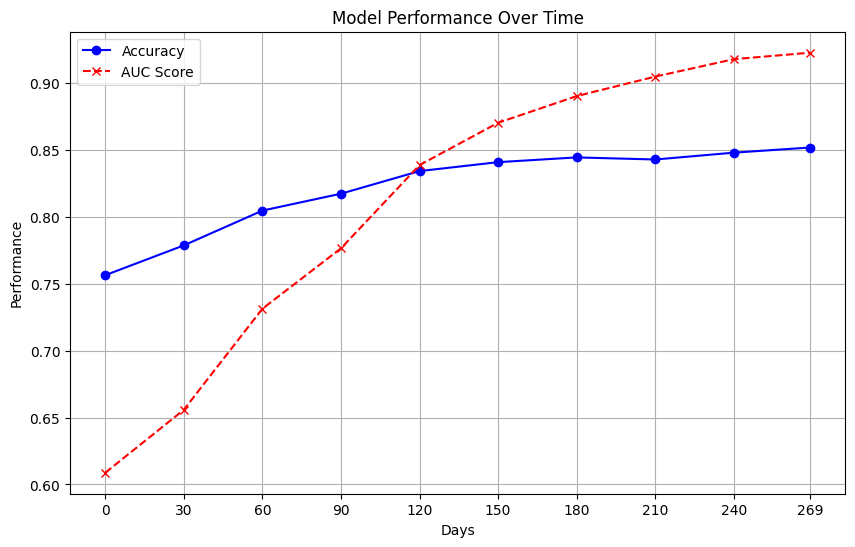

In [ ]:
# Plot the DataFrame
plt.figure(figsize=(10, 6))
plt.plot(df['x_values'], df['accuracy'], marker='o', linestyle='-', color='b', label='Accuracy')
plt.plot(df['x_values'], df['auc_score'], marker='x', linestyle='--', color='r', label='AUC Score')
plt.title('Model Performance Over Time')
plt.xlabel('Days')
plt.ylabel('Performance')
plt.grid(True)
plt.legend()
plt.xticks(x_values)
plt.show()